### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

### description du dataset

In [2]:
df_comp = pd.read_csv("../Data/train.csv")
df = df_comp.copy()
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [3]:
# del df['id']
# del df['onpromotion']
# del df['store_nbr']
# del df['family']
# df.head()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [5]:
df.date = pd.to_datetime(df.date)
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [7]:
df_sales = df.groupby(["date"]).sum()[['sales']]
df_sales.head(20)

,sales
date,
2013-01-01,2511.618999
2013-01-02,496092.417944
2013-01-03,361461.231124
2013-01-04,354459.677093
2013-01-05,477350.121229
2013-01-06,519695.401088
2013-01-07,336122.801066
2013-01-08,318347.777981
2013-01-09,302530.809018


In [8]:
df_sales.isna().sum()

sales    0
dtype: int64

In [9]:
df_sales = df_sales.asfreq('d')

In [10]:
df_sales.isna().sum()

sales    4
dtype: int64

In [11]:
df_sales.ffill(inplace=True)

<Axes: xlabel='date'>

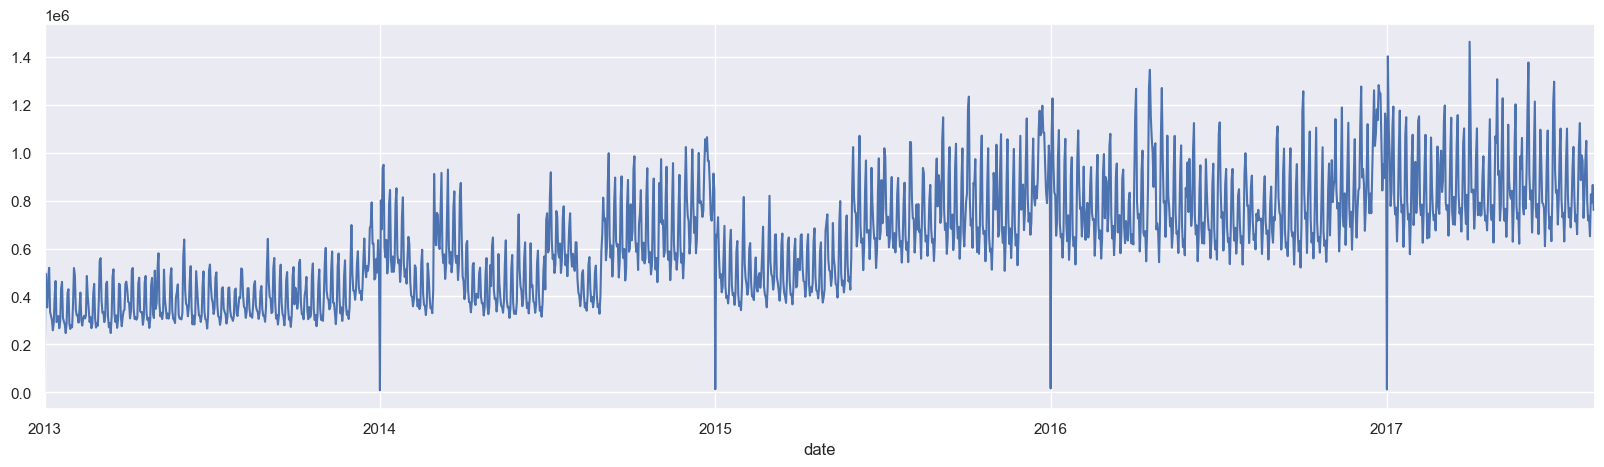

In [12]:
plt.figure(figsize=(20, 5))
df_sales.sales.plot()

<Axes: xlabel='sales', ylabel='Count'>

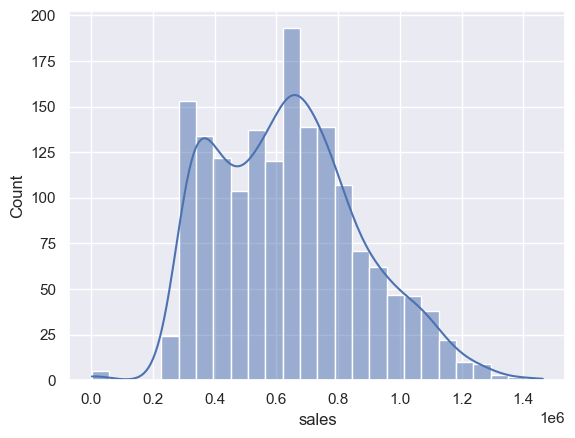

In [13]:
sns.histplot(df_sales, x="sales", kde=True)

In [14]:
sts.adfuller(df_sales.sales)

(-2.623339337385247,
 0.08826880168432444,
 22,
 1665,
 {'1%': -3.434283579780684,
  '5%': -2.863277451883613,
  '10%': -2.5676949772294817},
 42939.367186274896)

In [15]:
s_dec_additive = seasonal_decompose(df_sales.sales, model='additive')

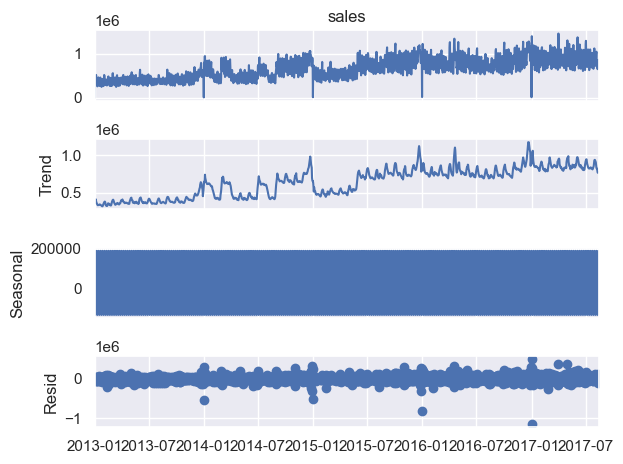

In [16]:
s_dec_additive.plot()
plt.show()

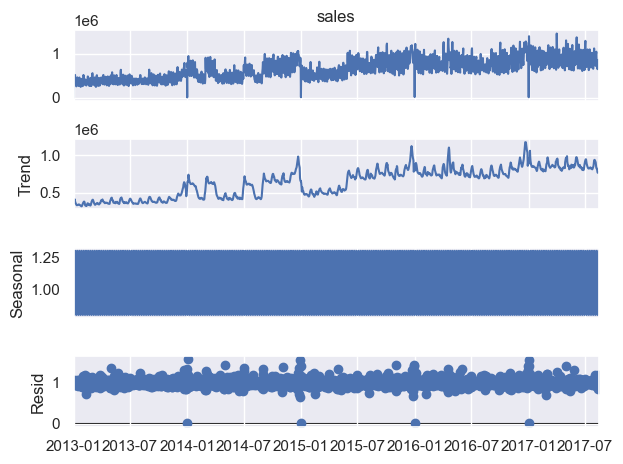

In [17]:
s_dec_multiplicative = seasonal_decompose(df_sales.sales, model='multiplicative')
s_dec_multiplicative.plot()
plt.show()

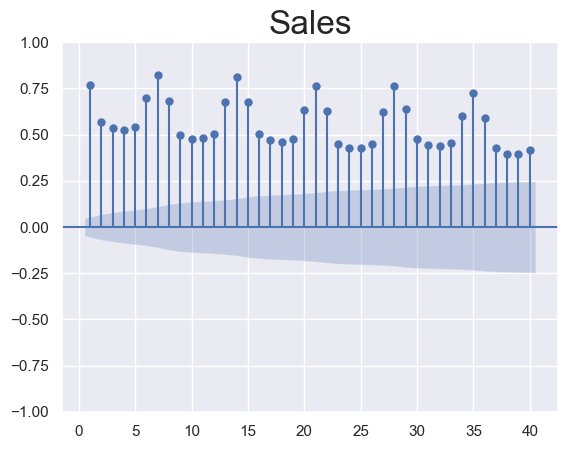

In [18]:
sgt.plot_acf(df_sales.sales, lags=40, zero=False)
plt.title("Sales", size=24)
plt.show()

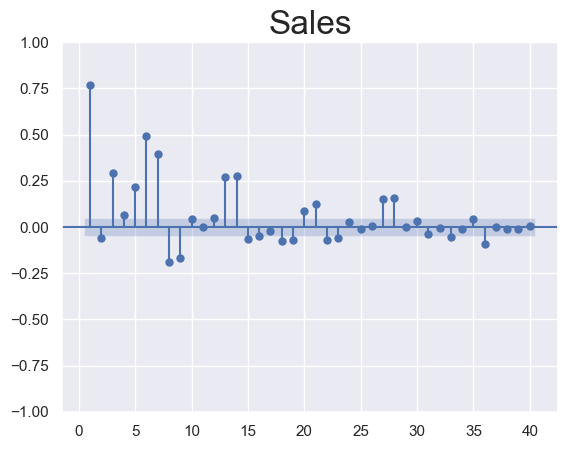

In [19]:
sgt.plot_pacf(df_sales.sales, lags=40, zero=False, method=('ols'))
plt.title("Sales", size=24)
plt.show()

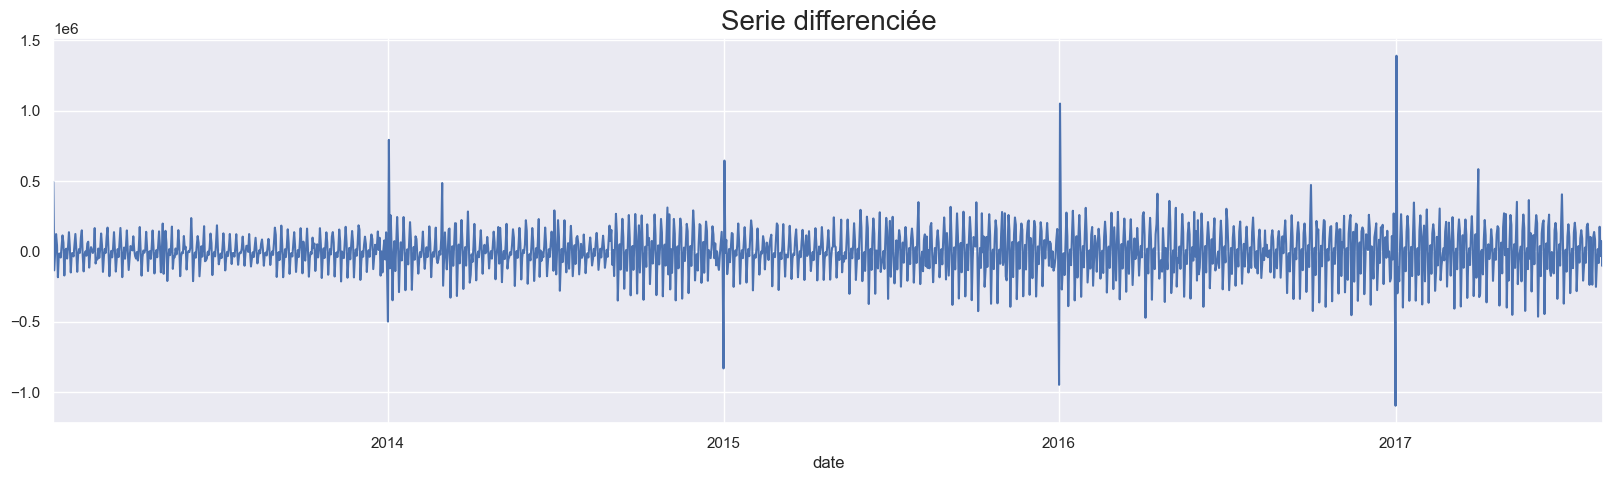

In [20]:
differenced = df_sales[['sales']].diff().dropna()

plt.figure(figsize=(20, 5))
differenced.sales.plot()
plt.title("Serie differenciée", size=20)
plt.show()

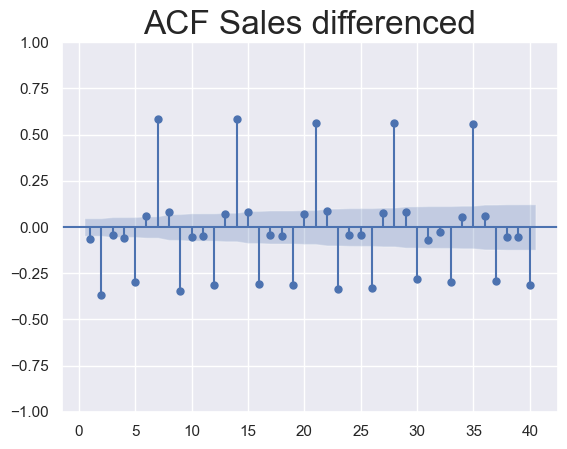

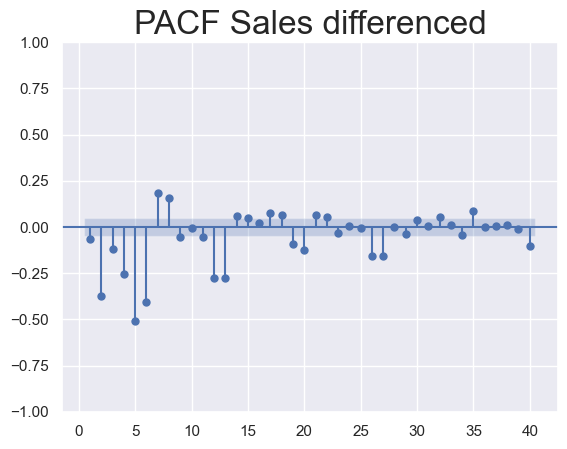

In [21]:
sgt.plot_acf(differenced.sales, lags=40, zero=False)
plt.title("ACF Sales differenced", size=24)
plt.show()

sgt.plot_pacf(differenced.sales, lags=40, zero=False, method=('ols'))
plt.title("PACF Sales differenced", size=24)
plt.show()

In [22]:
sts.adfuller(differenced.sales)

(-11.351129014298143,
 9.988955399777946e-21,
 25,
 1661,
 {'1%': -3.4342930672797065,
  '5%': -2.8632816397229064,
  '10%': -2.567697207194407},
 42885.32006127883)

In [23]:
p=5
q=5
d=1

In [24]:
size = int(len(df_sales)*80/100)
df_train, df_test = df_sales.iloc[:size], df_sales.iloc[size:]

In [25]:
model_ = ARIMA(df_train, order=(p, d, q))
result_ = model_.fit()
result_.summary()

c:\Users\herma\anaconda3\envs\pyther_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1350
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -17299.733
Date:                Tue, 13 Aug 2024   AIC                          34621.466
Time:                        13:12:39   BIC                          34678.744
Sample:                    01-01-2013   HQIC                         34642.917
                         - 09-11-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4542      0.092      4.920      0.000       0.273       0.635
ar.L2         -1.1531      0.074    -15.532      0.000      -1.299      -1.008
ar.L3          0.3171      0.131      2.421      0.015       0.060       0.574
ar.L4         -0.7031      0.075     -9.389      0.000      -0.850      -0.556
ar.L5         -0.3310      0.089     -3.714      0.000      -0.506      -0.156
ma.L1         -0.7147      0.091     -7.878      0.000      -0.892      -0.537
ma.L2          1.1811      0.083     14.253      0.000       1.019       1.344
ma.L3         -0.7455      0.124     -6.017      0.000      -0.988      -0.503
ma.L4          0.7107      0.084      8.431      0.000       0.545       0.876
ma.L5          0.0345      0.079      0.435      0.664      -0.121       0.190
sigma2      9.477e+09   8.17e-11   1.16e+20      0.000    9.48e+09    9.48e+09
===================================================================================
Ljung-Box (L1) (Q):                  12.60   Jarque-Bera (JB):             21746.38
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.35e+35. Standard errors may be unstable.
"""

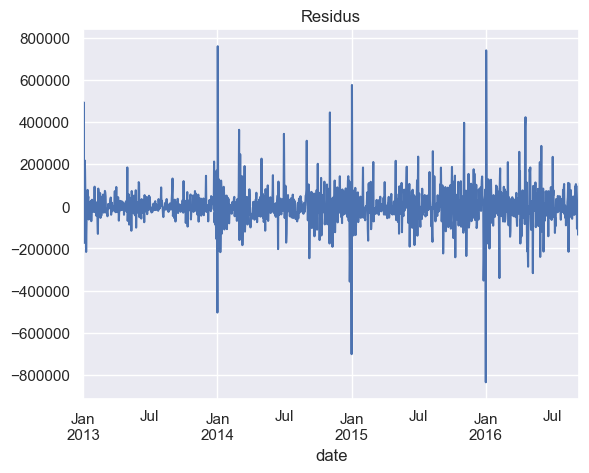

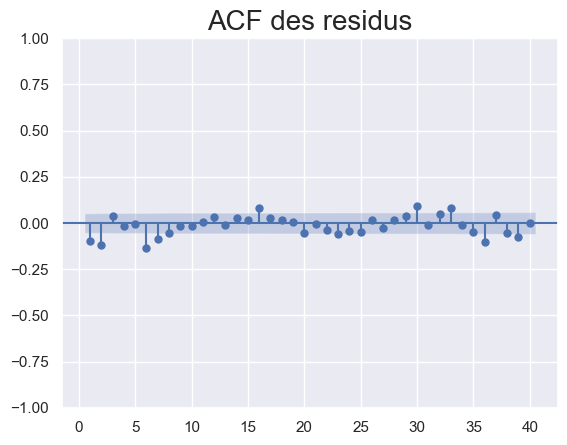

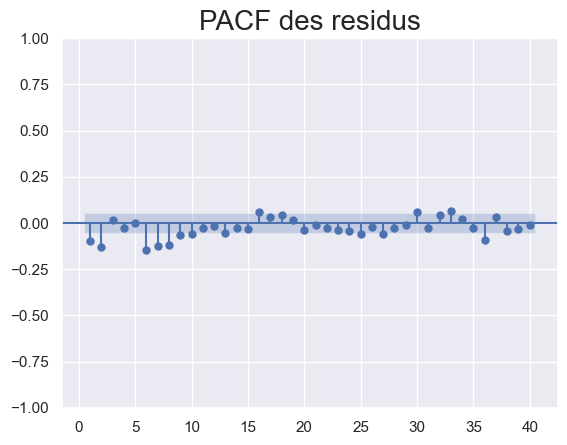

In [26]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = result_.resid

residuals.plot()
plt.title('Residus')
plt.show()

sgt.plot_acf(residuals, lags=40, zero=False)
plt.title('ACF des residus', size=20)
plt.show()

sgt.plot_pacf(residuals, lags=40, zero=False)
plt.title('PACF des residus', size=20)
plt.show()

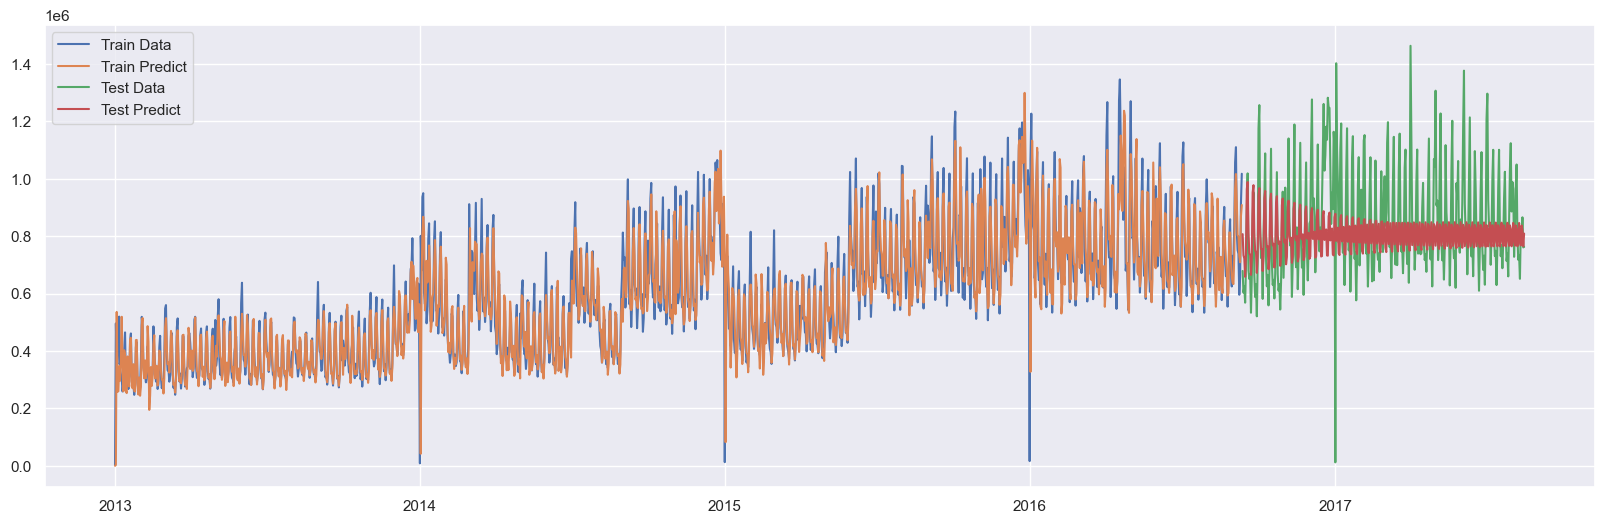

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

train_predict = result_.predict(start=df_train.index[0], end=df_train.index[-1])

test_predict = result_.predict(start=df_test.index[0], end=df_test.index[-1])

plt.figure(figsize=(20, 6))
plt.plot(df_train['sales'], label='Train Data')
plt.plot(train_predict, label='Train Predict')
plt.plot(df_test['sales'], label='Test Data')
plt.plot(test_predict, label='Test Predict')
plt.legend()
plt.show()

In [28]:
test_predict

2016-09-12    807060.649193
2016-09-13    733240.833249
2016-09-14    722320.338882
2016-09-15    658341.803508
2016-09-16    736516.089609
                  ...      
2017-08-11    767714.644206
2017-08-12    837191.760697
2017-08-13    822059.457241
2017-08-14    764833.153481
2017-08-15    808932.694060
Freq: D, Name: predicted_mean, Length: 338, dtype: float64

In [39]:
df_test_final = pd.read_csv("../Data/test.csv")
df_test_final.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [48]:
df_test_final = df_test_final.groupby('date')[['id']].mean()
df_test_final.shape

(16, 1)

In [49]:
predictions = result_.predict(start=df_test_final.index[0], end=df_test_final.index[-1])

type(predictions)

pandas.core.series.Series

In [50]:
df_test_final['sales'] = predictions[1]

In [51]:
df_test_final.head()

,id,sales
date,,
2017-08-16,3001778.5,780769.908833
2017-08-17,3003560.5,780769.908833
2017-08-18,3005342.5,780769.908833
2017-08-19,3007124.5,780769.908833
2017-08-20,3008906.5,780769.908833


In [52]:
df_test_final.to_csv("../Data/predictions.csv")